In [1]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# 载入数据
(x_train,y_train),(x_test,y_test) = mnist.load_data()
# (60000,28,28)->(60000,28,28,1),最后一维为深度，黑白为1，彩色为3
x_train = x_train.reshape(-1,28,28,1)/255.0
x_test = x_test.reshape(-1,28,28,1)/255.0
# 换one hot格式
y_train = np_utils.to_categorical(y_train,num_classes=10)
y_test = np_utils.to_categorical(y_test,num_classes=10)

# 定义顺序模型
model = Sequential()

# 第一个卷积层
# input_shape 输入平面
# filters 卷积核/滤波器个数
# kernel_size 卷积窗口大小
# strides 步长
# padding padding方式 same/valid
# activation 激活函数
model.add(Convolution2D(
    input_shape = (28,28,1),
    filters = 32,
    kernel_size = 5,
    strides = 1,
    padding = 'same',
    activation = 'relu',
    name = 'conv1'
))
# 第一个池化层
model.add(MaxPooling2D(
    pool_size = 2,
    strides = 2,
    padding = 'same',
    name = 'pool1'
))
# 第二个卷积层
model.add(Convolution2D(64,5,strides=1,padding='same',activation='relu',name='conv2'))
# 第二个池化层
model.add(MaxPooling2D(2,2,'same',name='pool2'))
# 把第二个池化层的输出扁平化为1维
model.add(Flatten())
# 第一个全连接层
model.add(Dense(1024,activation='relu'))
# Dropout
model.add(Dropout(0.5))
# 第二个全连接层
model.add(Dense(10,activation='softmax'))

# # 定义优化器
# adam = Adam(lr=1e-4)

# # 定义优化器,loss function,训练过程中计算准确率
# model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

# # 训练模型
# model.fit(x_train,y_train,batch_size=64,epochs=10)

# # 评估模型
# loss,accuracy = model.evaluate(x_test,y_test)

# print('test loss',loss)
# print('test accuracy',accuracy)

Instructions for updating:
Colocations handled automatically by placer.


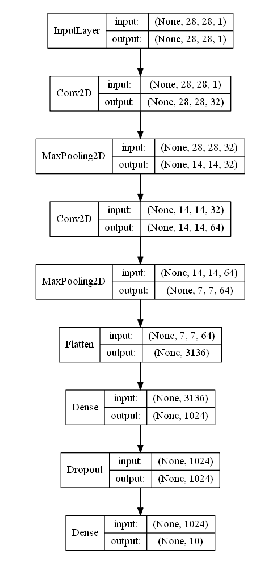

In [3]:
plot_model(model,to_file="model.png",show_shapes=True,show_layer_names=False,rankdir='TB')
plt.figure(figsize=(10,10))
img = plt.imread("model.png")
plt.imshow(img)
plt.axis('off')
plt.show()